In [1]:
#Necessary package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Sourcing

#### Please place the file in the same location as that of the jupyter notebook before running the notebook

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.shape

(9240, 37)

In [4]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### We can clearly see that null values are present

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### For some variables, outliers are present that are required to be scaled for better interpretability of the model coefficients.

# Data Preparation

In [6]:
print('Current lead conversion rate (in %): ', round((leads_df['Converted'].sum()/leads_df['Converted'].count())*100, 2))

Current lead conversion rate (in %):  38.54


## Missing Value Treatment

In [7]:
# missing_value_df contains the information about the null values present is different columns
missing_value_df = pd.DataFrame(leads_df.isnull().sum(), columns=['Null Value Count'])
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


#### We will simply drop all those columns which has null value % more than 30%.

In [8]:
leads_df = leads_df.drop(['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [9]:
missing_value_df = pd.DataFrame(leads_df.isnull().sum(), columns=['Null Value Count'])
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


#### Also, we will check for any invalid values present in the categorical columns at this stage as presence of those will be as good as a null value

In [10]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

#### No invalid values present

In [11]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

#### No invalid values present

In [12]:
leads_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

#### No invalid values present

In [13]:
leads_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

#### No invalid values present

In [14]:
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### No invalid values present

In [15]:
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
China                      2
Bangladesh                 2
Philippines                2
Uganda                     2
Netherlands                2
Belgium                    2
Ghana                      2
Italy                      2
Asia/Pacific Region        2
Vietnam                    1
Kenya                      1
Malaysia                   1
Tanzania                   1
Sri Lanka                  1
Indonesia                  1
Russia        

#### No invalid values present

In [16]:
leads_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Here, we can see that there is a value 'Select' which is an invalid value for Specialization. This occurs when a field in the form is left blank. We will consider this as a null value. We will add the count of 'Select' to the null values dataframe against Specialization.

In [17]:
missing_value_df.loc['Specialization', 'Null Value Count'] = missing_value_df.loc['Specialization', 'Null Value Count']+1942
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


In [18]:
leads_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Here, we can see that there is a value 'Select' which is an invalid value for How did you hear about X Education. This occurs when a field in the form is left blank. We will consider this as a null value. We will add the count of 'Select' to the null values dataframe against How did you hear about X Education.

In [19]:
missing_value_df.loc['How did you hear about X Education', 'Null Value Count'] = missing_value_df.loc['How did you hear about X Education', 'Null Value Count']+5043
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


In [20]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### No invalid values present

In [21]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### No invalid values present

In [22]:
leads_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

#### No invalid values present

In [23]:
leads_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

#### No invalid values present

In [24]:
leads_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### No invalid values present

In [25]:
leads_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### No invalid values present

In [26]:
leads_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### No invalid values present

In [27]:
leads_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#### No invalid values present

In [28]:
leads_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#### No invalid values present

In [29]:
leads_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#### No invalid values present

In [30]:
leads_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

#### No invalid values present

In [31]:
leads_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

#### No invalid values present

In [32]:
leads_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Here, we can see that there is a value 'Select' which is an invalid value for Lead Profile. This occurs when a field in the form is left blank. We will consider this as a null value. We will add the count of 'Select' to the null values dataframe against Lead Profile.

In [33]:
missing_value_df.loc['Lead Profile', 'Null Value Count'] = missing_value_df.loc['Lead Profile', 'Null Value Count']+4146
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


In [34]:
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Here, we can see that there is a value 'Select' which is an invalid value for City. This occurs when a field in the form is left blank. We will consider this as a null value. We will add the count of 'Select' to the null values dataframe against City.

In [35]:
missing_value_df.loc['City', 'Null Value Count'] = missing_value_df.loc['City', 'Null Value Count']+2249
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


In [36]:
leads_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### No invalid values present

In [37]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### No invalid values present

In [38]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### No invalid values present

In [39]:
# missing_value_df now accounts for the all invalid values present
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


#### We will again drop all those columns which has null value % more than 30%.

In [40]:
leads_df = leads_df.drop(['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'], axis=1)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [41]:
missing_value_df = pd.DataFrame(leads_df.isnull().sum(), columns=['Null Value Count'])
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Lead Source,36,0.39
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,137,1.48
Total Time Spent on Website,0,0.00
Page Views Per Visit,137,1.48


#### Now, columns - 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course' has null values.  For these null values we will either drop them or will choose an approach to impute them depending on the business scenario.

### 1. Lead Source

In [42]:
# This has only 0.39% of null values. We can choose to impute the missing values
# Since, this is a categorical variable, we will impute the missing values by the category with highest frequecy
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [43]:
# 'Google' has the highest frequncy
leads_df['Lead Source'] = leads_df['Lead Source'].fillna('Google')

### 2. TotalVisits

In [44]:
# This has only 1.48% of null values. We can choose to impute the missing values
# Since, this is a continuous variable, we will impute the missing values by the median value of the column. We will not use mean as it is susceptible to outliers

leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median())

### 3. Page Views Per Visit	

In [45]:
# This has only 1.48% of null values. We can choose to impute the missing values
# Since, this is a continuous variable, we will impute the missing values by the median value of the column. We will not use mean as it is susceptible to outliers

leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median())

### 4. Last Activity

In [46]:
# This has only 1.11% of null values. We can choose to impute the missing values
# Since, this is a categorical variable, we will impute the missing values by the category with highest frequecy

leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [47]:
# 'Email Opened' has the highest frequncy
leads_df['Last Activity'] = leads_df['Last Activity'].fillna('Email Opened')

### 5. Country, What is your current occupation, What matters most to you in choosing a course	

In [48]:
# All these columns has 26.63%, 29.11% and 29.32% of null values respectively. 
# If we choose to impute the missing values by the category with highest frequecy then it will create a biasing effect for a particular category in the dataset
# To avoid the above scenario, we will drop the null values

print(leads_df.dropna().shape)
print(leads_df.shape)

(4926, 27)
(9240, 27)


#### But if we drop the null values we would loose almost 50% of our data as shown above which is not acceptable. Hence, we will drop these columns.

In [49]:
leads_df = leads_df.drop(['Country', 'What is your current occupation', 'What matters most to you in choosing a course'], axis=1)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [50]:
missing_value_df = pd.DataFrame(leads_df.isnull().sum(), columns=['Null Value Count'])
missing_value_df['Null Value %'] = round((missing_value_df['Null Value Count']/len(leads_df))*100, 2)
missing_value_df

,Null Value Count,Null Value %
Prospect ID,0,0.0
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


#### Now, there are no missing values

## Outlier Analysis

In [51]:
#Below function will return the outlier rows for the column name passed with the function call
def outlier(col):
    Q1 = leads_df[col].quantile(0.05)
    Q3 = leads_df[col].quantile(0.95)
    IQR = Q3 - Q1
    return leads_df[(leads_df[col] < Q1 - 1.5*IQR) | (leads_df[col] > Q3 + 1.5*IQR)] 

# All the rows which has value more than the sum of 95th percentile and 1.5 times the inter quartile range or less than the differnce between 5th percentile and 1.5 times the inter quartile range will be considered as outliers

In [52]:
#Below function creates a box plot for the column name passed with all the aesthetics reqd.
def box_plot(col):
    sns.boxplot(y=leads_df[col])
    plt.ylabel(col, fontweight='bold', fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.show()

### 1. Outlier analysis of TotalVisits column

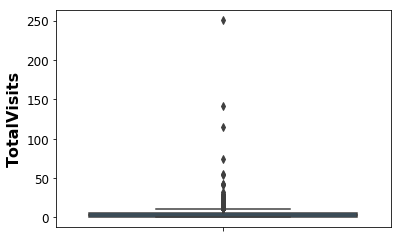

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,...,No,No,No,No,No,No,No,No,No,Email Opened
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2563,ce04a5a0-e2ad-4281-9b8f-32ad6b184a80,634882,Landing Page Submission,Direct Traffic,No,No,0,27.0,386,5.40,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2861,dc888c15-9a7b-42f0-9843-3a989033071f,632239,Landing Page Submission,Organic Search,No,No,0,29.0,209,2.90,...,No,No,No,No,No,No,No,No,Yes,Modified
4471,b7706a2c-bd5f-4793-a5ae-6f2fb0707fe7,616739,Landing Page Submission,Google,Yes,No,0,28.0,81,3.50,...,No,No,No,No,No,No,No,No,Yes,Modified
5026,698a32b4-24a3-4c35-be41-b7e8710f31bc,611589,API,Organic Search,No,No,1,26.0,120,13.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
5283,8d5d2f30-7ca5-4406-9d2b-3b97114b2cf3,609249,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,...,No,No,No,No,No,No,No,No,No,Page Visited on Website
5530,ac2645d4-d3b6-4574-9e7b-6b380db4a127,607494,Landing Page Submission,Direct Traffic,Yes,No,0,41.0,311,1.14,...,No,No,No,No,No,No,No,No,No,Page Visited on Website


In [53]:
box_plot('TotalVisits')
outlier('TotalVisits')

#### Clearly, outliers are present but we will choose to keep them as the column under observation represents the no.of visits by a customer on the website. If we drop them, we might loose out on some of the hot leads.  Also, we will be scaling the data using Min Max Scaler which will take care of these outliers.

### 2. Outlier analysis of Total Time Spent on Website column

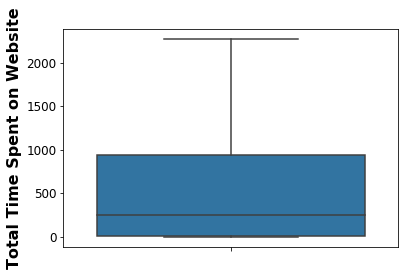

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [54]:
box_plot('Total Time Spent on Website')
outlier('Total Time Spent on Website')

#### No, outliers are present.

### 3. Outlier analysis of Page Views Per Visit column 

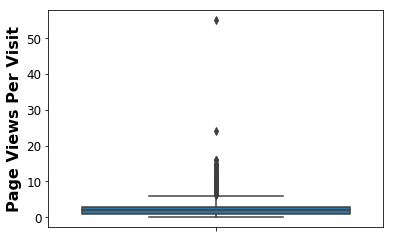

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.0,...,No,No,No,No,No,No,No,No,No,Modified
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.0,...,No,No,No,No,No,No,No,No,Yes,Modified
5164,7b9369a0-b997-41f0-8a04-68677de0f1c8,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,...,No,No,No,No,No,No,No,No,Yes,Modified
5495,48a5b72c-db78-48ab-bb15-8210754102ab,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,...,No,No,No,No,No,No,No,No,Yes,Modified
6805,57c557f0-f373-4468-affb-3ed5a03ea47c,597579,API,Organic Search,No,No,1,24.0,1527,24.0,...,No,No,No,No,No,No,No,No,No,Modified


In [55]:
box_plot('Page Views Per Visit')
outlier('Page Views Per Visit')

#### Clearly, outliers are present but we will choose to keep them as the column under observation represents the average  no. of pages viewed by the customer during the visits. A high value of this can be an indicator that the customer is genuinely interested to know about the courses and thus makes him/her a potential lead. 

## Data Visualization

In [56]:
def data_viz(col):
    df = leads_df.groupby(col).agg({'Converted':['sum', 'count']})
    df.columns = df.columns.droplevel()
    df.columns = ['Converted', 'Total']
    df['% Converted'] = round((df['Converted']/df['Total'])*100, 2)
    
    sns.barplot(df.index, df['% Converted'])
    plt.xlabel(col, fontweight='bold', fontsize=14)
    plt.ylabel('% Converted', fontweight='bold', fontsize=14)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.title('Conversion rates in '+col, fontweight='bold', fontsize=14)    

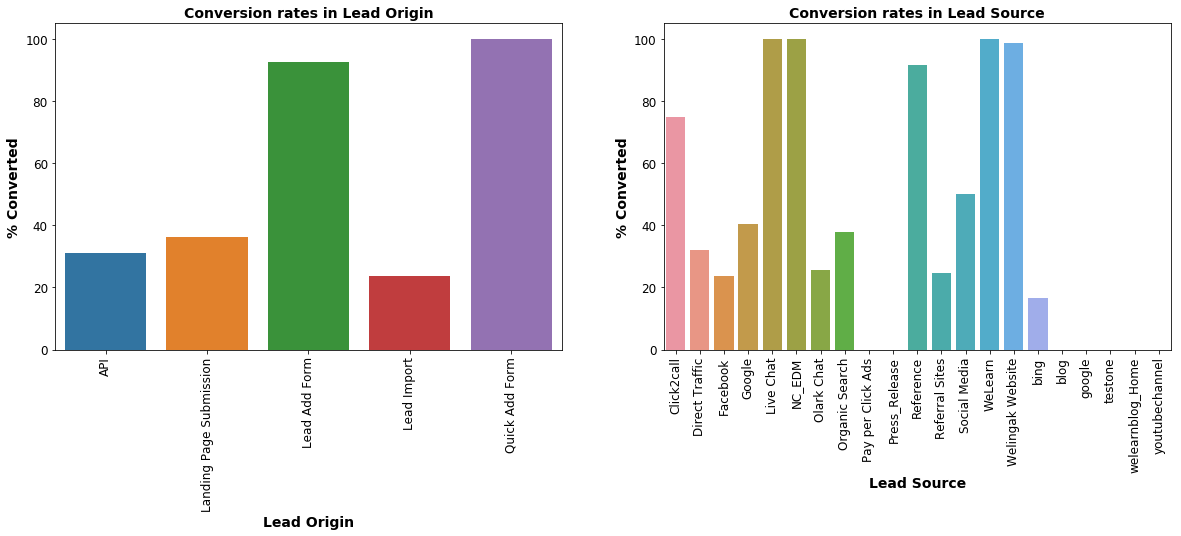

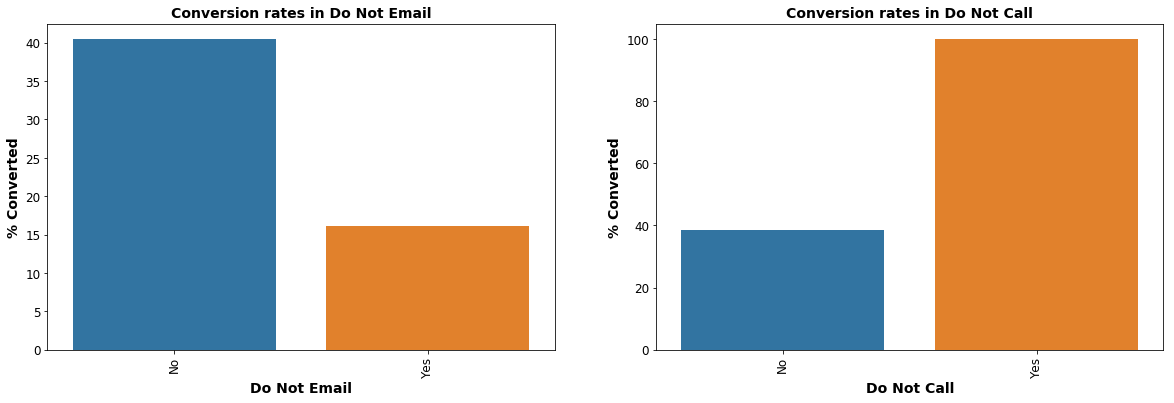

In [57]:
plt.figure(figsize=(20, 6))
           
plt.subplot(121)
data_viz('Lead Origin')
           
plt.subplot(122)
data_viz('Lead Source')


plt.figure(figsize=(20, 6))
           
plt.subplot(121)
data_viz('Do Not Email')
           
plt.subplot(122)
data_viz('Do Not Call')

### Inferences from the above plot -
#### 1. In Lead Origin variable, most leads are getting converted in Quick Add Form and Lead Add Form. But, if we see carefully, Quick Add Form has only 1 entry. So, we can say that Lead Add Form has the highest potential for leads conversion.
#### 2. In Lead Source, most no. of conversions are getting done in Live Chat, NC_EDM and WeLearn. These are the Lead Source platforms. So, for a better conversion rate these should be targeted.
#### 3. If we see thta plots for Do Not Email and Do Not Call we can  see that, potential leads usually prefers a formal mail communication regarding the course instead of a call.

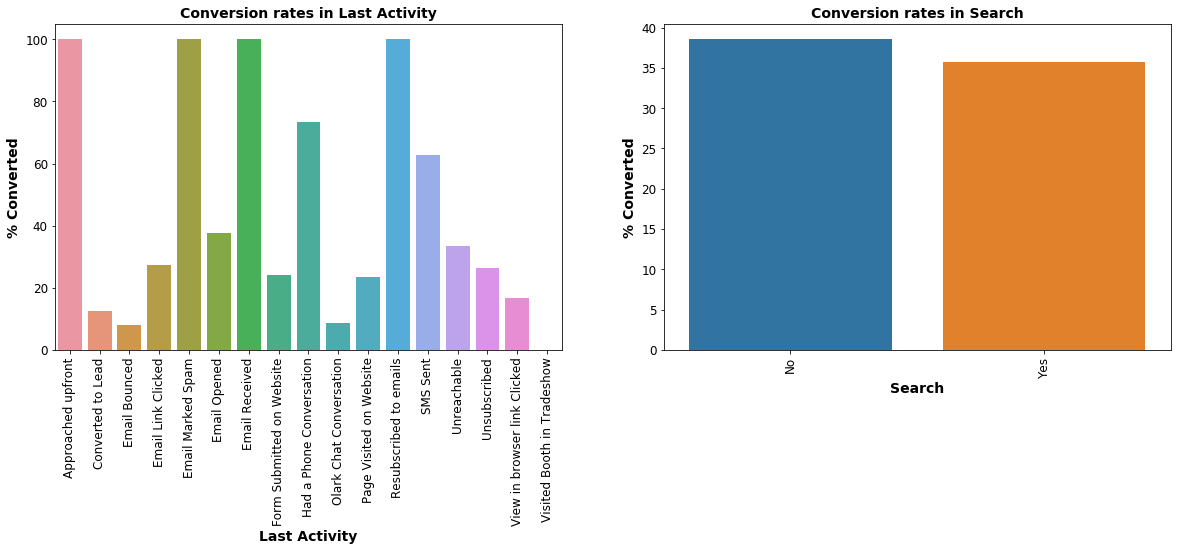

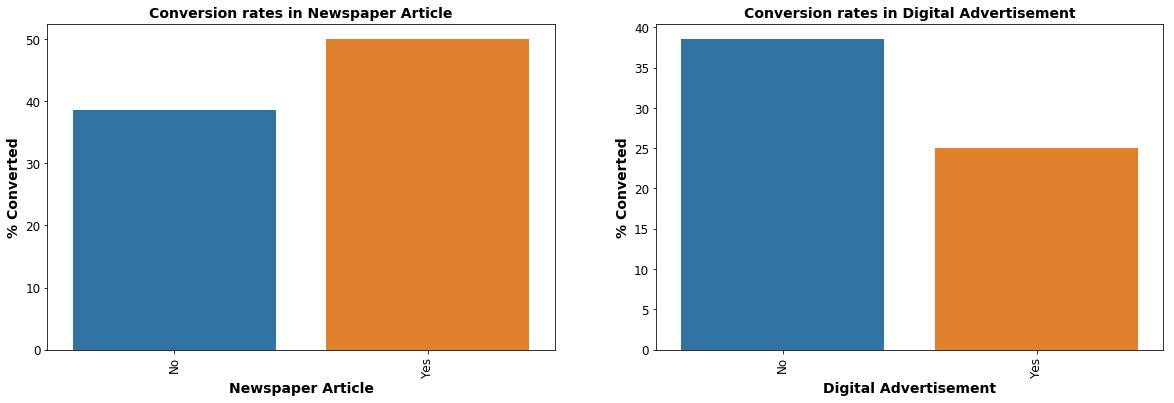

In [58]:
plt.figure(figsize=(20, 6))
           
plt.subplot(121)
data_viz('Last Activity')
           
plt.subplot(122)
data_viz('Search')


plt.figure(figsize=(20, 6))
           
plt.subplot(121)
data_viz('Newspaper Article')
           
plt.subplot(122)
data_viz('Digital Advertisement')

### Inferences from the above plot -
#### 1. If we see the Last Activity status of the leads, we can see that the ones who were approached over mail performed some actions over the mails received that resulted in a conversion. So email is the most important channel for communication.
#### 2. There are no significant patterns visible of conversions while searching/browsing the internet, but if the ad is in a newspaper then there is a high probability of conversion.

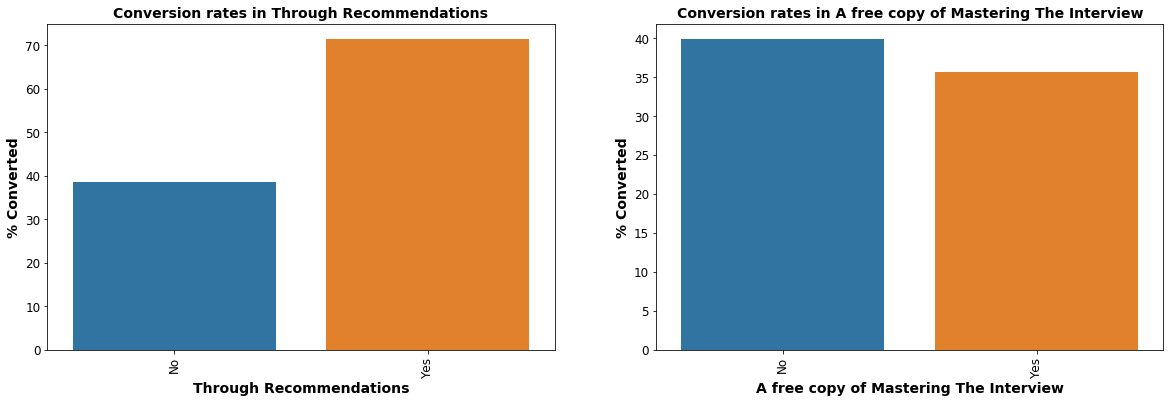

In [59]:
plt.figure(figsize=(20, 6))
           
plt.subplot(121)
data_viz('Through Recommendations')
           
plt.subplot(122)
data_viz('A free copy of Mastering The Interview')

### Inferences from the above plot -
#### 1. Recommendations also has a huge potential of lead conversion.
#### 2. Mostly it doesn't matter if a customer is getting a free copy of Mastering The Interview. This has no potential for leads conversion.

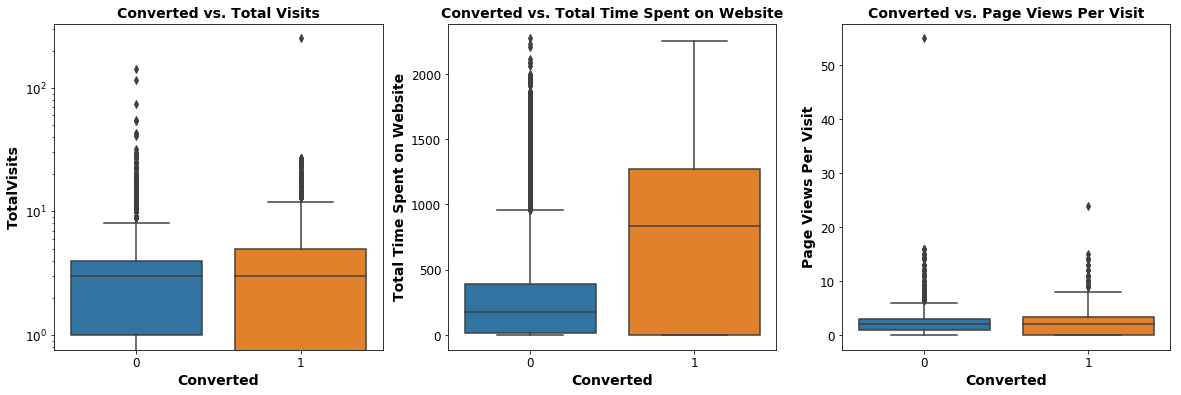

In [60]:
plt.figure(figsize=(20, 6))
           
plt.subplot(131)
sns.boxplot(leads_df['Converted'], leads_df['TotalVisits'])
plt.yscale('log')
plt.xlabel('Converted', fontweight='bold', fontsize=14)
plt.ylabel('TotalVisits', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Converted vs. Total Visits', fontweight='bold', fontsize=14) 

plt.subplot(132)
sns.boxplot(leads_df['Converted'], leads_df['Total Time Spent on Website'])
plt.xlabel('Converted', fontweight='bold', fontsize=14)
plt.ylabel('Total Time Spent on Website', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Converted vs. Total Time Spent on Website', fontweight='bold', fontsize=14) 

plt.subplot(133)
sns.boxplot(leads_df['Converted'], leads_df['Page Views Per Visit'])
plt.xlabel('Converted', fontweight='bold', fontsize=14)
plt.ylabel('Page Views Per Visit', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Converted vs. Page Views Per Visit', fontweight='bold', fontsize=14) 

plt.show()

### Inferences from the above plot -
#### Total no. of visits to the website and Page Views per Visit has no such significant impact on the conversion rate while Total time spent by the customer on the website is a direct determinant of the conversion rate.

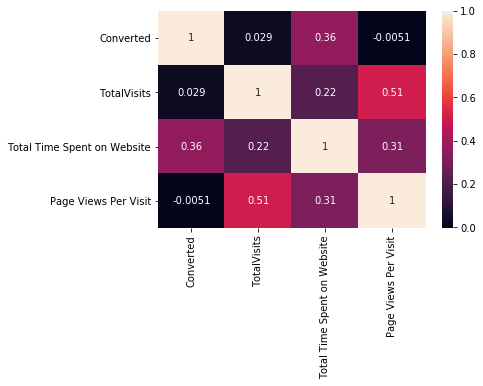

In [61]:
sns.heatmap(leads_df.drop('Lead Number', axis=1).corr(), annot=True)
plt.show()

## Data Preparation for Modelling

In [62]:
# For some categorical columns, there is no variability present i.e., only 1 category is present throughout the column
# We will drop such columns

leads_df = leads_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


In [63]:
# When we were doing the invalid data check, we came across many categorical columns which has Yes or No values. 
# We will map these values to 1 and 0 respectively for converting these columns to numerical columns.

# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
            'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified


In [64]:
# We will create dummy variables for all the unordered categorical variables

def create_dummies(var, df):
    df1 = pd.get_dummies(df[var], drop_first=True)
    df = pd.concat([df, df1], axis=1)
    df.drop(var, axis=1, inplace=True)
    return df

leads_df = create_dummies('Lead Origin', leads_df)
leads_df = create_dummies('Lead Source', leads_df)
leads_df = create_dummies('Last Activity', leads_df)

leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Since Last Activity and Last Notable Activity has same categories, creating dummy variables out of them will create duplicate columns
# Hence, Last Notable Activity column dummies will have 'Last' appended at its end

df1 = pd.get_dummies(leads_df['Last Notable Activity'], drop_first=True)
df1_columns = list(df1.columns)
df1_columns = list(map(lambda x: x+' Last', df1_columns))
df1.columns = df1_columns
leads_df = pd.concat([leads_df, df1], axis=1)
leads_df.drop('Last Notable Activity', axis=1, inplace=True)

leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Form Submitted on Website Last,Had a Phone Conversation Last,Modified Last,Olark Chat Conversation Last,Page Visited on Website Last,Resubscribed to emails Last,SMS Sent Last,Unreachable Last,Unsubscribed Last,View in browser link Clicked Last
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train test split and Feature Scaling

In [66]:
# Setting the Lead Number column as index
leads_df.set_index('Lead Number', inplace=True)
leads_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Form Submitted on Website Last,Had a Phone Conversation Last,Modified Last,Olark Chat Conversation Last,Page Visited on Website Last,Resubscribed to emails Last,SMS Sent Last,Unreachable Last,Unsubscribed Last,View in browser link Clicked Last
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
# Train test split

from sklearn.model_selection import train_test_split

X = leads_df.drop(['Prospect ID', 'Converted'], axis=1)
y = leads_df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [68]:
# Scaling the features using MinMaxScaler. This automatically takes care of the outliers present.

from sklearn.preprocessing import MinMaxScaler

cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = MinMaxScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])       
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Form Submitted on Website Last,Had a Phone Conversation Last,Modified Last,Olark Chat Conversation Last,Page Visited on Website Last,Resubscribed to emails Last,SMS Sent Last,Unreachable Last,Unsubscribed Last,View in browser link Clicked Last
Lead Number,,,,,,,,,,,,,,,,,,,,,
614587,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594769,0,0,0.007968,0.549296,0.018182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581700,0,0,0.015936,0.170335,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
609249,1,0,0.294821,0.532130,0.224182,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
631017,0,0,0.011952,0.595951,0.054545,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Building

In [69]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# We will use RFE for coarse adjustments and manual feature selection for fine adjustments

lr = LogisticRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 10).fit(X_train, y_train)

In [71]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Add Form,Welingak Website,Email Link Clicked Last,Email Opened Last,Modified Last,Olark Chat Conversation Last,Page Visited on Website Last
Lead Number,,,,,,,,,,
614587,0,0.000000,0.000000,0,0,0,1,0,0,0
594769,0,0.549296,0.018182,0,0,0,1,0,0,0
581700,0,0.170335,0.024182,0,0,0,0,0,0,0
609249,1,0.532130,0.224182,0,0,0,0,0,0,1
631017,0,0.595951,0.054545,0,0,0,0,1,0,0


## MODEL 1

In [72]:
X_train_rfe = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.5
Date:                Sun, 25 Aug 2019   Deviance:                       5915.0
Time:                        22:35:36   Pearson chi2:                 6.59e+03
No. Iterations:                    23   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0172      0.081     -0.213      0.831      -0.175       0.14

#### Welingak Website variable has p value more than the threshold value of 0.05. Hence, we will drop it.

In [73]:
X_train_new = X_train_rfe.drop('Welingak Website', axis = 1)

## MODEL 2

In [74]:
X_train_lm = sm.add_constant(X_train_new)
logm1 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.7
Date:                Sun, 25 Aug 2019   Deviance:                       5929.4
Time:                        22:35:37   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0164      0.081     -0.204      0.839      -0.174       0.14

In [75]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.94
6,Email Opened Last,1.61
7,Modified Last,1.61
3,Page Views Per Visit,1.18
2,Total Time Spent on Website,1.13
9,Page Visited on Website Last,1.11
4,Lead Add Form,1.09
8,Olark Chat Conversation Last,1.08
5,Email Link Clicked Last,1.06
1,Do Not Email,1.05


### This seems to be quite a decent model as all the p values and VIF values are within the range.

In [76]:
# Predictions on the training data
y_train_pred = logm1.predict(X_train_lm).values.reshape(-1)

In [77]:
# y_train_pred_final is a dataframe which we will use to find the optimal value of the cut off probability
# 'Actually_Converted?' is the actual target value, 'Lead Score' is a value out of 100 which is an indicator of how hot the lead is

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Actually_Converted?'] = y_train
y_train_pred_final['Lead_Score'] = y_train_pred
y_train_pred_final['Lead_Score'] = y_train_pred_final['Lead_Score']*100
y_train_pred_final.head()

,Actually_Converted?,Lead_Score
Lead Number,,
614587,0,17.693371
594769,1,66.091997
581700,0,63.943687
609249,0,8.617868
631017,0,52.384633


### Finding the Optimal Cutoff Point

In [78]:
numbers = [x*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

# All the columns from 0 to 90 represents the predicted target value corresponding to the cut off lead score

,Actually_Converted?,Lead_Score,0,10,20,30,40,50,60,70,80,90
Lead Number,,,,,,,,,,,,
614587,0,17.693371,1,1,0,0,0,0,0,0,0,0
594769,1,66.091997,1,1,1,1,1,1,1,0,0,0
581700,0,63.943687,1,1,1,1,1,1,1,0,0,0
609249,0,8.617868,1,0,0,0,0,0,0,0,0,0
631017,0,52.384633,1,1,1,1,1,1,0,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs we got above

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [x*10 for x in range(10)]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Actually_Converted?'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    prob  accuracy     sensi     speci
0    0.0  0.384045  1.000000  0.000000
10  10.0  0.470625  0.985910  0.149347
20  20.0  0.738095  0.871578  0.654869
30  30.0  0.790507  0.826892  0.767821
40  40.0  0.790198  0.770934  0.802209
50  50.0  0.772109  0.628824  0.861446
60  60.0  0.768244  0.533414  0.914659
70  70.0  0.757267  0.444042  0.952560
80  80.0  0.736549  0.361111  0.970633
90  90.0  0.687693  0.206924  0.987450


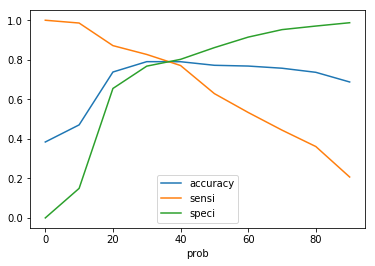

In [80]:
# Let's plot accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 38 is the optimum point to take it as a cutoff lead score for lead conversion. But, we have to reach 80% lead conversion rate as well. For this, the optimum value will be 33.

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 33 else 0)
y_train_pred_final.head()

,Actually_Converted?,Lead_Score,0,10,20,30,40,50,60,70,80,90,final_predicted
Lead Number,,,,,,,,,,,,,
614587,0,17.693371,1,1,0,0,0,0,0,0,0,0,0
594769,1,66.091997,1,1,1,1,1,1,1,0,0,0,1
581700,0,63.943687,1,1,1,1,1,1,1,0,0,0,1
609249,0,8.617868,1,0,0,0,0,0,0,0,0,0,0
631017,0,52.384633,1,1,1,1,1,1,0,0,0,0,1


In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

confusion_train = confusion_matrix(y_train_pred_final['Actually_Converted?'], y_train_pred_final['final_predicted'])

print('Accuracy score: ', accuracy_score(y_train_pred_final['Actually_Converted?'], y_train_pred_final['final_predicted']))
print()
print('Sensitivity: ', confusion_train[1,1]/float(confusion_train[1,1]+confusion_train[1,0]))
print()
print('Specificity: ', confusion_train[0,0]/float(confusion_train[0,0]+confusion_train[0,1]))

Accuracy score:  0.7935992578849722

Sensitivity:  0.8144122383252818

Specificity:  0.7806224899598394


# Predictions and Evaluation

In [83]:
# Applying transformations to testing data
X_test[cols] = scaler.transform(X_test[cols])       
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Form Submitted on Website Last,Had a Phone Conversation Last,Modified Last,Olark Chat Conversation Last,Page Visited on Website Last,Resubscribed to emails Last,SMS Sent Last,Unreachable Last,Unsubscribed Last,View in browser link Clicked Last
Lead Number,,,,,,,,,,,,,,,,,,,,,
615582,0,0,0.031873,0.110915,0.048545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588939,1,0,0.007968,0.408891,0.036364,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
621242,1,0,0.003984,0.000880,0.018182,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
589803,0,0,0.007968,0.142165,0.036364,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651441,0,0,0.011952,0.088468,0.054545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Now let's use our model to make predictions.
X_train_lm = X_train_lm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [85]:
# making predictions
y_test_pred = logm1.predict(X_test_new).values.reshape(-1)

In [86]:
y_test_pred_final = pd.DataFrame()
y_test_pred_final['Actually_Converted?'] = y_test
y_test_pred_final['Lead_Score'] = y_test_pred
y_test_pred_final['Lead_Score'] = y_test_pred_final['Lead_Score']*100
y_test_pred_final.head()

,Actually_Converted?,Lead_Score
Lead Number,,
615582,1,21.076397
588939,0,9.257434
621242,0,1.991027
589803,0,24.458918
651441,0,19.081601


In [87]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Lead_Score.map( lambda x: 1 if x > 33 else 0)
y_test_pred_final.head()

,Actually_Converted?,Lead_Score,final_predicted
Lead Number,,,
615582,1,21.076397,0
588939,0,9.257434,0
621242,0,1.991027,0
589803,0,24.458918,0
651441,0,19.081601,0


In [88]:
confusion_test = confusion_matrix(y_test_pred_final['Actually_Converted?'], y_test_pred_final['final_predicted'])

print('Accuracy score: ', accuracy_score(y_test_pred_final['Actually_Converted?'], y_test_pred_final['final_predicted']))
print()
print('Sensitivity: ', confusion_test[1,1]/float(confusion_test[1,1]+confusion_test[1,0]))
print()
print('Specificity: ', confusion_test[0,0]/float(confusion_test[0,0]+confusion_test[0,1]))

Accuracy score:  0.797979797979798

Sensitivity:  0.8393686165273909

Specificity:  0.7716814159292036


#### We can see that our model is performing quite well with the unknown test set of data. Also, 0.8393 Sensitivity implies we have achieved 80% lead conversion rate.

In [89]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.7
Date:                Sun, 25 Aug 2019   Deviance:                       5929.4
Time:                        22:35:38   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0164      0.081     -0.204      0.839      -0.174       0.142
Do Not Email                    -1.6883      0.158    -10.709      0.000      -1.997      -1.379
Total Time Spent on Website      4.1820      0.145     28.852      0.000       3.898       4.466
Page Views Per Visit            -5.0861      0.975     -5.218      0.000      -6.996      -3.176
Lead Add Form                    3.8069      0.189     20.177      0.000       3.437       4.177
Email Link Clicked Last         -1.7777      0.252     -7.063      0.000      -2.271      -1.284
Email Opened Last               -1.5208      0.085    -17.995      0.000      -1.686      -1.355
Modified Last                   -2.1029      0.087    -24.045      0.000      -2.274      -1.932
Olark Chat Conversation Last    -2.7680      0.313     -8.840      0.000      -3.382      -2.154
Page Visited on Website Last    -1.7417      0.179     -9.709      0.000      -2.093      -1.390
================================================================================================
"""

We can see that the equation to get the prediction probability is:

$ Pred Prob = -1.6883\times Do Not Email + 4.1820 \times Total Time Spent on Website Page Views Per Visit - 5.0861\times Page Views Per Visit + 3.8069\times Lead Add Form - 1.7777\times Email Link Clicked Last - 1.5208\times Email Opened Last - 2.1029\times Email Opened Last - 2.768\times Olark Chat Conversation Last - 1.7417\times Page Visited on Website Last - 0.0164  $

## Inferences -
#### 1. We have got an accuracy of 79% with our training data and 80% with testing data which says model is not overfitting the training data and is performing quite well with unknown data.
#### 2. p values of all the variables are 0, which means all the coefficients are significant.

## Recommendations to improve the Leads Conversion Rate -
#### 1. Approach the customer over mail for explaining the course details and then if required then approach over call. First approach needs to be over mail only. Any other media of communication like chats, etc might fail to convert the customer.
#### 2. Rigorous marketing needs to be carried out through Newspaper ads and Recommendations as these media has a lot of potential of leads conversion.
#### 3. Look out for customers who are spending quite a good amount of time browsing through the website. These customers possesses a higher probability of conversion.
#### 4. Leads originating from 'Lead Add Form' has got a very high chance of getting converted and thus this source needs to be tapped upon.
#### 5. Lucrative referral bonus policies should be implemented for the students. This will ensure that not only the sales team is acquiring leads but the current and past students are also getting few leads for the company. A customer will always prefer to go by the feedback provided by his/her friend instead of listening to an unknown sales representative.